## Multiclass Classification

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


--2021-06-24 06:40:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.176, 172.217.2.112, 172.217.164.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  48.1MB/s    in 9.5s    

2021-06-24 06:41:01 (52.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# unzip downloaded data file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()


In [ ]:
!ls 10_food_classes_all_data

test  train


In [ ]:
import os

# walk through 10_food_classes_all_data directory
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 10 directories and 0 imag

## Visualize

In [ ]:
# Visualize images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# function to view random image
def view_random_image(target_dir, target_class):
  # set up target dir
  target_folder = target_dir + target_class

  # get random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # read image and plot
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)

  print(f"Image shape : {img.shape}")
  
  return img


['2850167.jpg']
Image shape : (512, 512, 3)


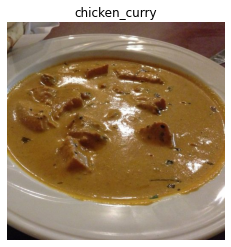

In [ ]:
img = view_random_image(target_dir="10_food_classes_all_data/train/", target_class="chicken_curry")

['1747438.jpg']
Image shape : (512, 512, 3)


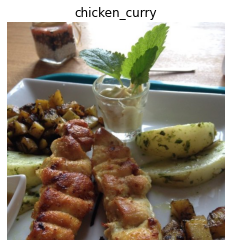

In [ ]:
img = view_random_image(target_dir="10_food_classes_all_data/train/", target_class="chicken_curry")

['3291261.jpg']
Image shape : (512, 512, 3)


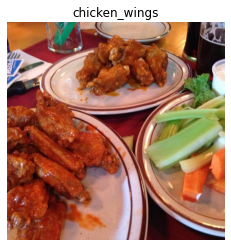

In [ ]:
img = view_random_image(target_dir="10_food_classes_all_data/train/", target_class="chicken_wings")

['3534162.jpg']
Image shape : (288, 512, 3)


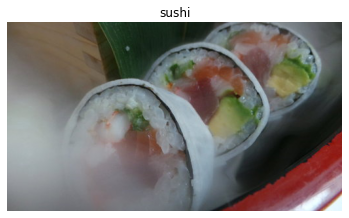

In [ ]:
img = view_random_image(target_dir="10_food_classes_all_data/train/", target_class="sushi")

['3289745.jpg']
Image shape : (384, 512, 3)


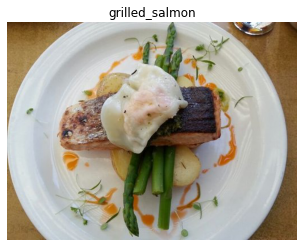

In [ ]:
img = view_random_image(target_dir="10_food_classes_all_data/train/", target_class="grilled_salmon")

['265492.jpg']
Image shape : (384, 512, 3)


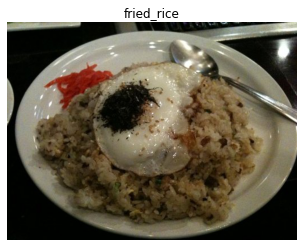

In [ ]:
img = view_random_image(target_dir="10_food_classes_all_data/train/", target_class="fried_rice")

['2989328.jpg']
Image shape : (384, 512, 3)


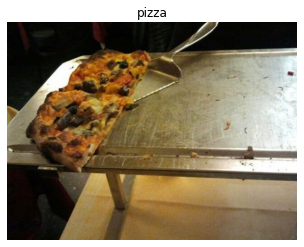

In [ ]:
img = view_random_image(target_dir="10_food_classes_all_data/train/", target_class="pizza")

['2729975.jpg']
Image shape : (512, 512, 3)


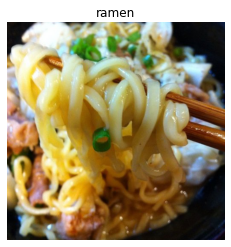

In [ ]:
img = view_random_image(target_dir="10_food_classes_all_data/train/", target_class="ramen")

['3488531.jpg']
Image shape : (512, 512, 3)


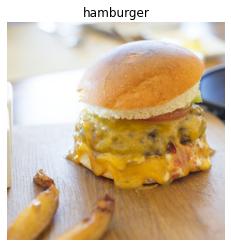

In [ ]:
img = view_random_image(target_dir="10_food_classes_all_data/train/", target_class="hamburger")

['1456899.jpg']
Image shape : (512, 512, 3)


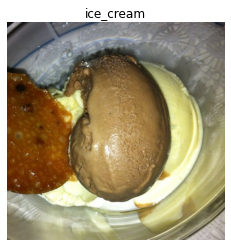

In [ ]:
img = view_random_image(target_dir="10_food_classes_all_data/train/", target_class="ice_cream")

['2392910.jpg']
Image shape : (512, 512, 3)


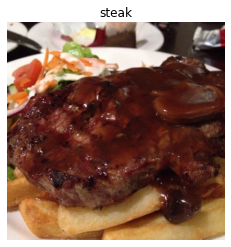

In [ ]:
img = view_random_image(target_dir="10_food_classes_all_data/train/", target_class="steak")

In [ ]:
# setup directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# let's get class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1660415.jpg']
Image shape : (512, 442, 3)


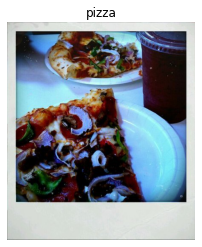

In [ ]:
# visualize
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))


## Preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Create Model

In [ ]:
# import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation


In [ ]:
# create model
model_1 = Sequential()
model_1.add(Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)))
model_1.add(Conv2D(10, 3, activation="relu"))
model_1.add(MaxPool2D(pool_size=2))
model_1.add(Conv2D(10, 3, activation="relu"))
model_1.add(Conv2D(10, 3, activation="relu"))
model_1.add(MaxPool2D())
model_1.add(Flatten())
model_1.add(Dense(10, activation="softmax"))



In [ ]:
# compile model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


## Fit Model

In [ ]:
# fit model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
235/235 [==============================] - 75s 185ms/step - loss: 2.1231 - accuracy: 0.2360 - val_loss: 1.9753 - val_accuracy: 0.2852
Epoch 2/5
235/235 [==============================] - 44s 188ms/step - loss: 1.8676 - accuracy: 0.3556 - val_loss: 1.8811 - val_accuracy: 0.3424
Epoch 3/5
235/235 [==============================] - 43s 184ms/step - loss: 1.6330 - accuracy: 0.4504 - val_loss: 1.8688 - val_accuracy: 0.3456
Epoch 4/5
235/235 [==============================] - 44s 186ms/step - loss: 1.1416 - accuracy: 0.6224 - val_loss: 2.1528 - val_accuracy: 0.2964
Epoch 5/5
235/235 [==============================] - 43s 184ms/step - loss: 0.5444 - accuracy: 0.8281 - val_loss: 2.8875 - val_accuracy: 0.2848


In [ ]:
# model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Evaluate Model

In [ ]:
# evaluate model
model_1.evaluate(test_data)


79/79 [==============================] - 10s 132ms/step - loss: 2.8875 - accuracy: 0.2848


[2.887450695037842, 0.2847999930381775]

In [ ]:
# Plot train and test curves
def plot_loss_curve(history):
  """
  returns separate loss curve for training and test data
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # plot loss
  plt.figure()
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel(epochs)
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel(epochs)
  plt.legend()


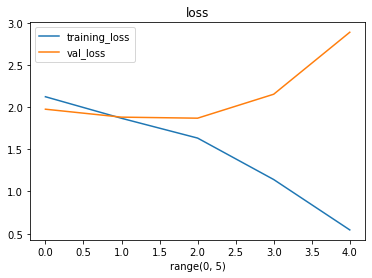

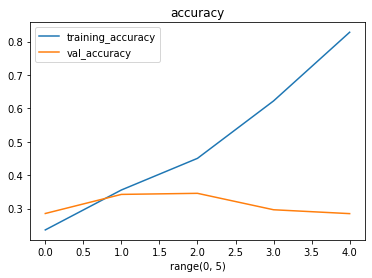

In [ ]:
# check loss
plot_loss_curve(history_1)

###Remarks :
Seems model is overfitting the training set badly. ie gets good results in training data but fails to generalize well in unseen data

## Adjust Parameters
Fix overfitting by
- Get more data : having more data gives model more opportunity to learn diverse patterns
- Simplify the model : overfitting could be due to model is more complicated, to simplify reduce # of layers or # of hidden units in layers
- Data Augumentation : this manipulates training data to add more diversity patterns without altering original data
- Transfer Learing : this leverages the patterns another model has learned on similar data, allows to use those patterns on the training data

In [ ]:
# simply model by removing Conv2D layers

# create model
model_2 = Sequential()
model_2.add(Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)))
model_2.add(MaxPool2D(pool_size=2))
model_2.add(Conv2D(10, 3, activation="relu"))
model_2.add(MaxPool2D())
model_2.add(Flatten())
model_2.add(Dense(10, activation="softmax"))


In [ ]:
# compile model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
# fit model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
235/235 [==============================] - 42s 177ms/step - loss: 2.1006 - accuracy: 0.2412 - val_loss: 1.9449 - val_accuracy: 0.3036
Epoch 2/5
235/235 [==============================] - 41s 175ms/step - loss: 1.7394 - accuracy: 0.4075 - val_loss: 1.8584 - val_accuracy: 0.3576
Epoch 3/5
235/235 [==============================] - 41s 174ms/step - loss: 1.3275 - accuracy: 0.5685 - val_loss: 2.0112 - val_accuracy: 0.3280
Epoch 4/5
235/235 [==============================] - 41s 174ms/step - loss: 0.8257 - accuracy: 0.7535 - val_loss: 2.2888 - val_accuracy: 0.3224
Epoch 5/5
235/235 [==============================] - 40s 172ms/step - loss: 0.4362 - accuracy: 0.8816 - val_loss: 2.6937 - val_accuracy: 0.3112


In [ ]:
# model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

In [ ]:
# evaluate model
model_2.evaluate(test_data)


79/79 [==============================] - 10s 125ms/step - loss: 2.6937 - accuracy: 0.3112


[2.6936755180358887, 0.31119999289512634]

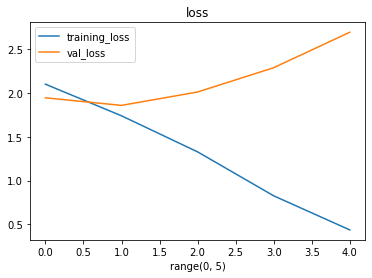

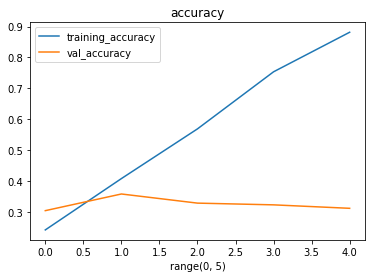

In [ ]:
# check out loss curve
plot_loss_curve(history_2)


### Remarks : 
Looks like simplifying the model experiment didn't work. accyract went down and overfitting continued. 

We will try data augumentation

## Try reduce overfitting by data augumentation

In [ ]:
# create imagedatagenerator training instance with augumentation
train_datagen_augumented = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.3,
                                              horizontal_flip=True)


In [ ]:
# import data and augument it from training directory
print("Augumented Training data")
train_data_augumented = train_datagen_augumented.flow_from_directory(train_dir,
                                                                     target_size=(224, 224),
                                                                     batch_size=32,
                                                                     class_mode="categorical",
                                                                     shuffle=True)


Augumented Training data
Found 7500 images belonging to 10 classes.


In [ ]:
# Visualize Augumented Training data
# get some sample augumented data batches
images, labels = train_data.next()
augumented_images, augumented_labels = train_data_augumented.next()


Shoing image number : 7


(-0.5, 223.5, 223.5, -0.5)

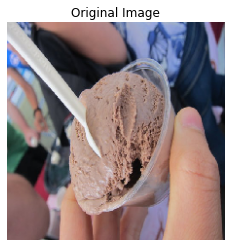

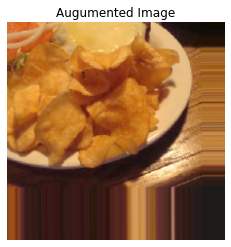

In [ ]:
# show original training and augumented training image
random_number = random.randint(0, 32)
print(f"Shoing image number : {random_number}")
plt.figure()
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augumented_images[random_number])
plt.title("Augumented Image")
plt.axis(False)


In [ ]:
# Model on Augumented Training data

# create model
model_3 = Sequential()
model_3.add(Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)))
model_3.add(MaxPool2D(pool_size=2))
model_3.add(Conv2D(10, 3, activation="relu"))
model_3.add(MaxPool2D())
model_3.add(Flatten())
model_3.add(Dense(10, activation="softmax"))


In [ ]:
# compile model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
# fit the model
history_3 = model_3.fit(train_data_augumented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augumented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
235/235 [==============================] - 100s 422ms/step - loss: 2.2259 - accuracy: 0.1856 - val_loss: 2.0237 - val_accuracy: 0.2872
Epoch 2/5
235/235 [==============================] - 99s 420ms/step - loss: 2.0992 - accuracy: 0.2468 - val_loss: 1.9649 - val_accuracy: 0.3196
Epoch 3/5
235/235 [==============================] - 99s 422ms/step - loss: 2.0657 - accuracy: 0.2633 - val_loss: 1.8796 - val_accuracy: 0.3476
Epoch 4/5
235/235 [==============================] - 99s 419ms/step - loss: 2.0240 - accuracy: 0.2897 - val_loss: 1.8766 - val_accuracy: 0.3380
Epoch 5/5
235/235 [==============================] - 101s 430ms/step - loss: 2.0171 - accuracy: 0.3015 - val_loss: 1.9587 - val_accuracy: 0.3148


In [ ]:
# get model summary
model_3.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

In [ ]:
# evaluate model
model_3.evaluate(test_data)


79/79 [==============================] - 10s 127ms/step - loss: 1.9587 - accuracy: 0.3148


[1.9586747884750366, 0.3147999942302704]

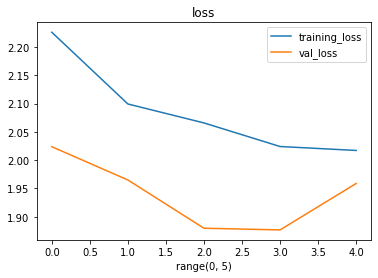

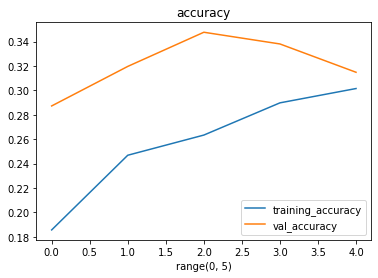

In [ ]:
# plot loss curve
plot_loss_curve(history_3)


In [ ]:
# create model by cloning, ie create from model_1
model_4 = tf.keras.models.clone_model(model_1)


In [ ]:
# compile model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
# fit model
history_4 = model_4.fit(train_data_augumented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augumented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
235/235 [==============================] - 101s 427ms/step - loss: 2.2977 - accuracy: 0.1348 - val_loss: 2.2518 - val_accuracy: 0.1592
Epoch 2/5
235/235 [==============================] - 100s 425ms/step - loss: 2.1920 - accuracy: 0.1908 - val_loss: 2.0715 - val_accuracy: 0.2520
Epoch 3/5
235/235 [==============================] - 100s 425ms/step - loss: 2.1061 - accuracy: 0.2427 - val_loss: 1.9342 - val_accuracy: 0.3272
Epoch 4/5
235/235 [==============================] - 100s 426ms/step - loss: 2.0582 - accuracy: 0.2660 - val_loss: 1.8606 - val_accuracy: 0.3624
Epoch 5/5
235/235 [==============================] - 101s 429ms/step - loss: 2.0159 - accuracy: 0.2928 - val_loss: 1.8212 - val_accuracy: 0.3836


In [ ]:
# get model summary
model_4.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
# evaluate model
model_4.evaluate(test_data)


79/79 [==============================] - 10s 130ms/step - loss: 1.8212 - accuracy: 0.3836


[1.8212285041809082, 0.38359999656677246]

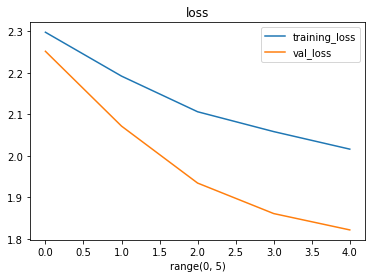

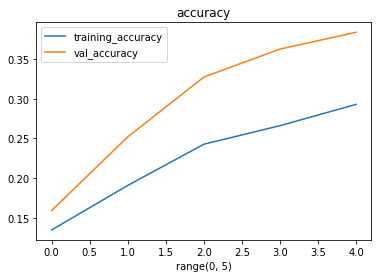

In [ ]:
# plot loss curve
plot_loss_curve(history_4)

## Repeat until satisfied

## Make Prediction
make predictions on custom images


In [ ]:
# get custom images to make prediction
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg


--2021-06-24 07:30:48--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg       [ <=>                ] 108.57K  --.-KB/s    in 0.007s  

2021-06-24 07:30:48 (14.9 MB/s) - ‘03-pizza-dad.jpeg’ saved [111177]

--2021-06-24 07:30:49--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg       [ <=>                ] 108.58K  --.-KB/s    in 0.007s  

2021-06-24 07:30:49 (14.8 MB/s) - ‘03-hamburger.jpeg’ saved [111183]

--2021-0

In [ ]:
# create function to import image and resize 
def load_and_prep_image(filename, img_shape=224):
  """
  Reads image from filename and turns it into tensor and reshapes it to (img_shape, img_shape, color_channels)
  """

  # read image
  img = tf.io.read_file(filename)

  # decode file into tensor
  img = tf.image.decode_image(img)

  # resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # rescale the image (get all values between 0 and 1)
  img = img/255.

  return img


In [ ]:
# make pred and plot function for multiclass images
# predict and plot function
def pred_and_plot(model, filename, class_names=class_names):
  """
  Import image in filename, make prediction and plot image with predicted class
  """

  # import target image and preprocess
  img = load_and_prep_image(filename)

  # make prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  
  # Add logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # plot image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False)


In [ ]:
!wget https://img.freepik.com/free-photo/assorted-indian-recipes-food-various_79295-7226.jpg

--2021-06-24 09:00:49--  https://img.freepik.com/free-photo/assorted-indian-recipes-food-various_79295-7226.jpg
Resolving img.freepik.com (img.freepik.com)... 104.89.2.169, 2600:1408:9000:89a::30ec, 2600:1408:9000:88a::30ec
Connecting to img.freepik.com (img.freepik.com)|104.89.2.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155907 (152K) [image/jpeg]
Saving to: ‘assorted-indian-recipes-food-various_79295-7226.jpg’

assorted-indian-rec 100%[===================>] 152.25K   899KB/s    in 0.2s    

2021-06-24 09:00:50 (899 KB/s) - ‘assorted-indian-recipes-food-various_79295-7226.jpg’ saved [155907/155907]



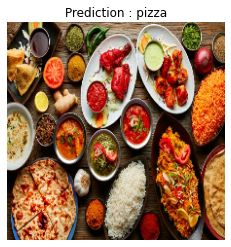

In [ ]:
# make prediction using model_4
pred_and_plot(model_4, "assorted-indian-recipes-food-various_79295-7226.jpg", class_names=class_names)


## Saving and Loading Model

In [ ]:
# Save model
model_4.save("saved_trained_model_4")

INFO:tensorflow:Assets written to: saved_trained_model_4/assets


In [ ]:
# Load saved model
loaded_model_4 = tf.keras.models.load_model("saved_trained_model_4")
loaded_model_4.evaluate(test_data)

79/79 [==============================] - 13s 163ms/step - loss: 1.8212 - accuracy: 0.3836


[1.8212285041809082, 0.38359999656677246]

In [ ]:
# compare loaded model to our existing model
model_4.evaluate(test_data)

79/79 [==============================] - 16s 200ms/step - loss: 1.8212 - accuracy: 0.3836


[1.821228265762329, 0.38359999656677246]